In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def rotation_matrix(theta):
    theta = np.deg2rad(theta)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    rotation = np.array([[cos_theta, -sin_theta, 0],
                         [sin_theta, cos_theta, 0],
                         [0, 0, 1]])

    return rotation

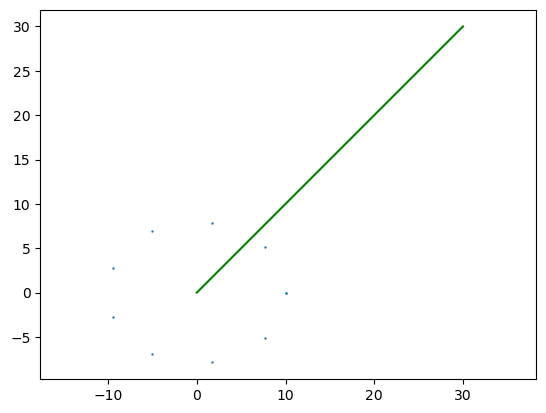

In [5]:
a = 10
b = 8

thetas = np.linspace(0, 2 * np.pi, 10)
x = a * np.cos(thetas)
y = b * np.sin(thetas)

p_x, p_y = 30, 30
plt.axis('equal')
plt.scatter(x, y, s=0.5)
plt.plot([0, p_x], [0, p_y], color='green')

In [6]:
body = np.array([x, y, np.ones(len(x))])

6.66044443118978 6.142300877492314


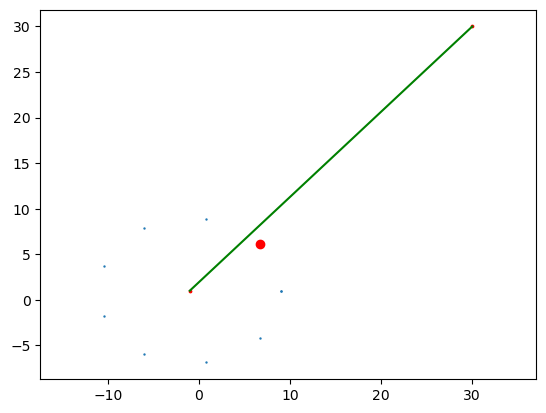

In [7]:
x_r, y_r, yaw = -1.0, 1.0, 0

rot_body = np.dot(body.T, rotation_matrix(-yaw))

x_rot = rot_body[:, 0] + x_r
y_rot = rot_body[:, 1] + y_r

x_ob, y_ob = 30, 30

distances = np.sqrt((x_rot - x_ob)**2 + (y_rot - x_ob)**2)
closest_index = np.argmin(distances)
closest_x, closest_y = x_rot[closest_index], y_rot[closest_index]

plt.axis('equal')
plt.scatter(x_rot, y_rot, s = 0.5)
plt.scatter(x_ob, y_ob,s = 3, color='red')
plt.scatter(x_r, y_r,s = 3, color='red')
plt.scatter(closest_x, closest_y, color='red', label='Closest Point')
plt.plot([x_r, x_ob], [y_r, y_ob], color='green')
print(closest_x, closest_y);


In [8]:
def rotation_matrix(theta):
    theta = np.deg2rad(theta)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    rotation = np.array([[cos_theta, -sin_theta, 0],
                         [sin_theta, cos_theta, 0],
                         [0, 0, 1]])

    return rotation

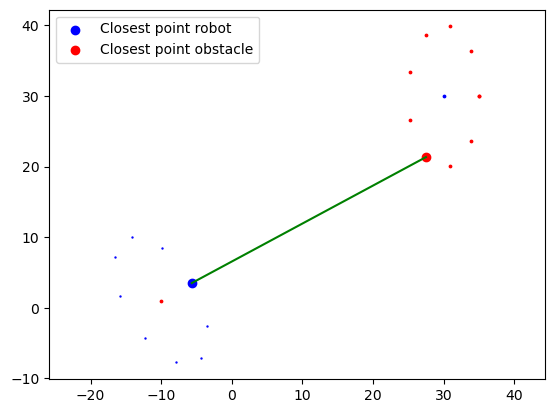

The closest point to the obstacle is (-5.669872981077806, 3.4999999999999996).
Min distance: 37.66293947071952
CPU times: user 262 ms, sys: 223 ms, total: 486 ms
Wall time: 232 ms


In [9]:
%%time
a = 5
b = 10

thetas = np.linspace(0, 2 * np.pi, 10)
x = a * np.cos(thetas)
y = b * np.sin(thetas)

body = np.array([x, y, np.ones(len(x))])

x_r, y_r, yaw = -10.0, 1.0, 30

rot_body = np.dot(body.T, rotation_matrix(-yaw))

x_rot = rot_body[:, 0] + x_r
y_rot = rot_body[:, 1] + y_r

# Define the parameters of the ellipse obstacle
x_ob_offset = 30
y_ob_offset = 30
yaw_obs = 0

a_ob = 8
b_ob = 4
x_ob = a_ob * np.cos(thetas)
y_ob = b_ob * np.sin(thetas)

body_obs = np.array([x, y, np.ones(len(x))])

rot_obs = np.dot(body_obs.T, rotation_matrix(-yaw_obs))

x_ob = rot_obs[:, 0] + x_ob_offset
y_ob = rot_obs[:, 1] + y_ob_offset

min_distance = np.inf

for x, y in zip(x_ob, y_ob):
    distances = np.sqrt((x_rot - x)**2 + (y_rot - y)**2)
    if np.min(distances) < min_distance:
        x_ob_min = x
        y_ob_min = y
        min_distance = np.min(distances)
        closest_index = np.argmin(distances)
        closest_x, closest_y = x_rot[closest_index], y_rot[closest_index]

plt.axis('equal')
plt.scatter(x_rot, y_rot, s=0.5, color='blue')
plt.scatter(x_ob, y_ob, s=3, color='red')
plt.scatter(x_ob_offset, y_ob_offset, s=3, color='blue')
plt.scatter(x_r, y_r, s=3, color='red')
plt.scatter(closest_x, closest_y, color='blue', label='Closest point robot')
plt.scatter(x_ob_min, y_ob_min, color='red', label='Closest point obstacle')
plt.plot([closest_x, x_ob_min], [closest_y, y_ob_min], color='green')
plt.legend()
plt.show()

print(f"The closest point to the obstacle is ({closest_x}, {closest_y}).")
print(f"Min distance: {min_distance}")


In [172]:
%%time
@jit(nopython=True)
def calculate_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    x1, y1 = point1
    x2, y2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

@jit(nopython=True)
def find_closest_points(points1, points2):
    """Find the closest two points between two arrays of points."""
    closest_distance = 1e9  # A large constant representing infinity
    closest_points = None

    for p1 in points1:
        for p2 in points2:
            distance = calculate_distance(p1, p2)
            if distance < closest_distance:
                closest_distance = distance
                closest_points = (p1, p2)

    return closest_points, closest_distance

# Example arrays of points
points_array1 = np.array([(1, 2), (3, 4), (5, 6)])
points_array2 = np.array([(2, 3), (4, 5), (6, 7), (8, 9)])

closest_points, distance = find_closest_points(points_array1, points_array2)

print("Closest Points:", np.array(closest_points))
print("Distance:", distance)



Closest Points: [[1 2]
 [2 3]]
Distance: 1.4142135623730951
CPU times: user 279 ms, sys: 0 ns, total: 279 ms
Wall time: 281 ms


In [174]:
closest_points[0][0]

1

In [165]:
%%time
# Example arrays of points
points_array1 = np.array([(1, 2), (3, 4), (5, 6)])
points_array2 = np.array([(2, 3), (4, 5), (6, 7), (8, 9)])

closest_points, distance = find_closest_points(points_array1, points_array2)

CPU times: user 61 µs, sys: 0 ns, total: 61 µs
Wall time: 65.1 µs


In [61]:
1/30

0.03333333333333333

In [10]:
def min_distance(robot_pose, obstacle_pose):
    x_robot, y_robot, yaw_robot, height_robot, width_robot = robot_pose
    x_obstacle, y_obstacle, yaw_obstacle, height_obstacle, width_obstacle = obstacle_pose

    thetas = np.linspace(0, 2 * np.pi, 100)
    
    x = height_robot * np.cos(thetas)
    y = width_robot * np.sin(thetas)
    body = np.array([x, y, np.ones(len(x))])
    rot_body = np.dot(body.T, rotation_matrix(-yaw_robot))
    x_rot = rot_body[:, 0] + x_robot
    y_rot = rot_body[:, 1] + y_robot

    robot_points = np.column_stack((x_rot, y_rot))

    # Define the parameters of the ellipse obstacle
    x_ob = height_obstacle * np.cos(thetas)
    y_ob = width_obstacle * np.sin(thetas)
    body_obs = np.array([x_ob, y_ob, np.ones(len(x))])
    rot_obs = np.dot(body_obs.T, rotation_matrix(-yaw_obstacle))
    x_ob_rot = rot_obs[:, 0] + x_obstacle
    y_ob_rot = rot_obs[:, 1] + y_obstacle

    obstacle_points = np.column_stack((x_ob_rot, y_ob_rot))

    min_distance = np.inf

    for x, y in zip(x_ob_rot, y_ob_rot):
        distances = np.sqrt((x_rot - x)**2 + (y_rot - y)**2)
        if np.min(distances) < min_distance:
            min_distance = np.min(distances)
            x_ob_min = x
            y_ob_min = y
            closest_index = np.argmin(distances)
            closest_x, closest_y = x_rot[closest_index], y_rot[closest_index]
    
    x_diff = closest_x - x_ob_min
    y_diff = closest_y - y_ob_min

    closest_points, distance = find_closest_points(robot_points, obstacle_points)

    plt.axis('equal')
    plt.scatter(x_rot, y_rot, s=0.5)
    plt.scatter(x_ob_rot, y_ob_rot, s=3, color='red')
    plt.scatter(x_r, y_r, s=3, color='red')
    plt.scatter(x_obstacle, y_obstacle, s=3, color='blue')
    plt.scatter(closest_x, closest_y, color='blue', label='Closest point robot')
    plt.scatter(x_ob_min, y_ob_min, color='red', label='Closest point obstacle')
    plt.plot([closest_x, x_ob_min], [closest_y, y_ob_min], color='green')
    plt.legend()
    plt.show()
    return x_diff, y_diff

In [39]:
x = 10 * np.cos(thetas)
y = 20 * np.sin(thetas)
body = np.array([x, y, np.ones(len(x))])
rot_body = np.dot(body.T, rotation_matrix(-np.pi))
x_rot = rot_body[:, 0] + 10
y_rot = rot_body[:, 1] + 10

In [46]:
np.column_stack((x_rot, y_rot))

array([19.9849715 , 10.54803665])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs


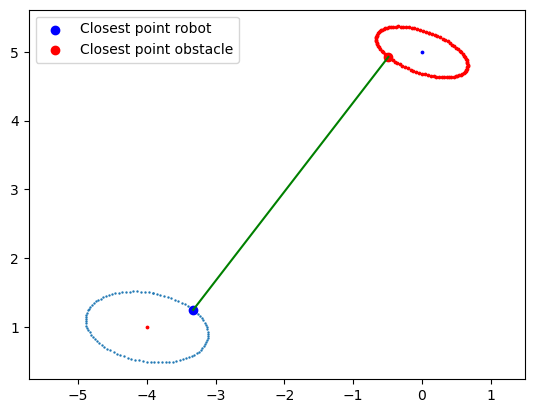

(-2.8382574028405827, -3.6778799103316437)

In [11]:
%time
# ROBOT
x_r = -4.0
y_r = 1.0
yaw = 80
height_robot = 0.5
width_robot  = 0.9

# OBSTACLE
x_obs = 0.0
y_obs = 5.0
yaw_obs = 70
height_obs = 0.3
width_obs  = 0.7

robot_pose = [x_r, y_r, yaw, height_robot, width_robot]
obstacle_pose = [x_obs, y_obs, yaw_obs, height_obs, width_obs]
min_distance(robot_pose, obstacle_pose)

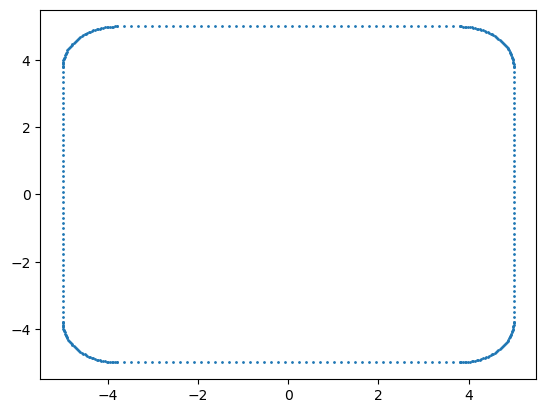

In [12]:
import numpy as np

def create_rounded_rectangle(width, height, radius, num_points=50):
    # Generate points for the top side
    x_top = np.linspace(-width/2 + radius, width/2 - radius, num_points)
    y_top = height/2 * np.ones_like(x_top)

    # Generate points for the bottom side
    x_bottom = np.linspace(width/2 - radius, -width/2 + radius, num_points)
    y_bottom = -height/2 * np.ones_like(x_bottom)

    # Generate points for the left side
    y_left = np.linspace(-height/2 + radius, height/2 - radius, num_points)
    x_left = -width/2 * np.ones_like(y_left)

    # Generate points for the right side
    y_right = np.linspace(height/2 - radius, -height/2 + radius, num_points)
    x_right = width/2 * np.ones_like(y_right)

    # Generate points for the top-left corner
    theta_top_left = np.linspace(np.pi, np.pi / 2, num_points)
    x_top_left = -width/2 + radius + radius * np.cos(theta_top_left)
    y_top_left = height/2 - radius + radius * np.sin(theta_top_left)

    # Generate points for the top-right corner
    theta_top_right = np.linspace(np.pi / 2, 0, num_points)
    x_top_right = width/2 - radius + radius * np.cos(theta_top_right)
    y_top_right = height/2 - radius + radius * np.sin(theta_top_right)

    # Generate points for the bottom-left corner
    theta_bottom_left = np.linspace(3 * np.pi / 2, np.pi, num_points)
    x_bottom_left = -width/2 + radius + radius * np.cos(theta_bottom_left)
    y_bottom_left = -height/2 + radius + radius * np.sin(theta_bottom_left)

    # Generate points for the bottom-right corner
    theta_bottom_right = np.linspace(2 * np.pi, 3 * np.pi / 2, num_points)
    x_bottom_right = width/2 - radius + radius * np.cos(theta_bottom_right)
    y_bottom_right = -height/2 + radius + radius * np.sin(theta_bottom_right)

    # Combine all the points to form the rounded rectangle
    x_points = np.concatenate([x_top, x_top_right, x_right, x_bottom_right,
                               x_bottom, x_bottom_left, x_left, x_top_left])
    y_points = np.concatenate([y_top, y_top_right, y_right, y_bottom_right,
                               y_bottom, y_bottom_left, y_left, y_top_left])

    return x_points, y_points

# Example usage:
width = 10
height = 10
radius = 1.2

x_points, y_points = create_rounded_rectangle(width, height, radius)

plt.scatter(x_points, y_points, s=1)


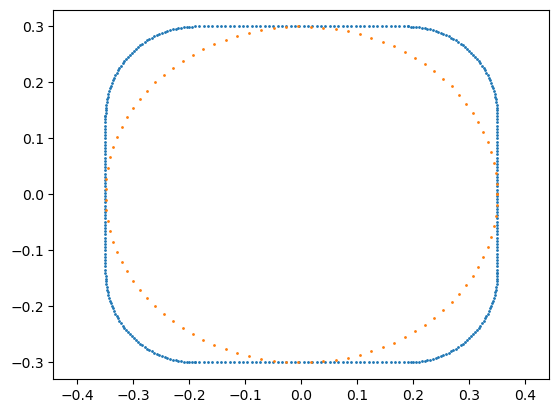

In [22]:
import numpy as np


def create_rounded_rectangle(width, height, radius, num_points=100):
    # Calculate the number of points per segment
    num_segment_points = num_points // 2

    # Calculate the angle increment for generating points on the corners
    angle_increment = np.pi / (2 * num_segment_points)

    # Generate points for the top side
    x_top = np.linspace(-width/2 + radius, width/2 - radius, num_segment_points)
    y_top = height/2 * np.ones_like(x_top)

    # Generate points for the bottom side
    x_bottom = np.linspace(width/2 - radius, -width/2 + radius, num_segment_points)
    y_bottom = -height/2 * np.ones_like(x_bottom)

    # Generate points for the left side
    y_left = np.linspace(-height/2 + radius, height/2 - radius, num_segment_points)
    x_left = -width/2 * np.ones_like(y_left)

    # Generate points for the right side
    y_right = np.linspace(height/2 - radius, -height/2 + radius, num_segment_points)
    x_right = width/2 * np.ones_like(y_right)

    # Generate points for the top-left corner
    theta = np.arange(np.pi, np.pi/2, -angle_increment)
    x_top_left = -width/2 + radius + radius * np.cos(theta)
    y_top_left = height/2 - radius + radius * np.sin(theta)

    # Generate points for the top-right corner
    theta = np.arange(np.pi/2, 0, -angle_increment)
    x_top_right = width/2 - radius + radius * np.cos(theta)
    y_top_right = height/2 - radius + radius * np.sin(theta)

    # Generate points for the bottom-left corner
    theta = np.arange(3*np.pi/2, np.pi, -angle_increment)
    x_bottom_left = -width/2 + radius + radius * np.cos(theta)
    y_bottom_left = -height/2 + radius + radius * np.sin(theta)

    # Generate points for the bottom-right corner
    theta = np.arange(2*np.pi, 3*np.pi/2, -angle_increment)
    x_bottom_right = width/2 - radius + radius * np.cos(theta)
    y_bottom_right = -height/2 + radius + radius * np.sin(theta)

    # Combine all the points to form the rounded rectangle
    x_points = np.concatenate([x_top, x_top_right, x_right, x_bottom_right,
                               x_bottom, x_bottom_left, x_left, x_top_left])
    y_points = np.concatenate([y_top, y_top_right, y_right, y_bottom_right,
                               y_bottom, y_bottom_left, y_left, y_top_left])

    return x_points, y_points

# Example usage:
robot_heigth = 0.7/2
robot_width = 0.6/2
radius = 0.08

thetas = np.linspace(0, 2 * np.pi, 100)
        
x = robot_heigth * np.cos(thetas)
y = robot_width * np.sin(thetas)

x_points, y_points = create_rounded_rectangle(robot_heigth*2, robot_width*2, radius*2)
plt.axis('equal')
plt.scatter(x_points, y_points, s=1)
plt.scatter(x, y, s=1)